# Imports

In [1]:
from tuned_lens.nn.lenses import Lens, LogitLens, TunedLens
import matplotlib.pyplot as plt
import glob
import json
import numpy as np

/mnt/ssd-1/gpaulo/miniconda3/envs/hyena/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Loading Results


In [27]:
all_results = {}

for folder in glob.glob('results/*'):
    model= folder.split('/')[-1]
    if model not in all_results:
        all_results[model] = {}
    for file in glob.glob(folder + '/*'):
        size = file.split('/')[-1]
        resultfile = file + "/aggregate_metrics.json"
        if size not in all_results[model]:
            all_results[model][size] = {}
        with open(resultfile) as f:
            result = json.load(f)
        all_results[model][size] = result


# Ploting Functions

In [66]:
def plot_results_all_models(all_results,size,type="tuned",metric="ce",normalized=True,inline=False):

    if size == "169m" or size == "130m":
            chosen_sizes = ["169m","130m"]
    elif size == "370m" or size == "410m" or size == "430m":
            chosen_sizes = ["370m","410m","430m"]
    elif size == "1b5" or size == "1.4b":
            chosen_sizes = ["1b5","1.4b"]
    elif size == "2.8b":
            chosen_sizes = ["2.8b"]
    else:
            marker="."
    _, ax1 = plt.subplots()
    if inline:
        if not normalized:
                ax2 = plt.axes([0.65, 0.2, 0.2, 0.2])
        else:
                ax2 = plt.axes([0.55, 0.50, 0.25, 0.25])
    
    for model in all_results:
                            
        for size in all_results[model]:
                if normalized:
                        depth = np.linspace(0,1,len(all_results[model][size]["tuned"]["ce"]))
                else:
                        depth = np.arange(0,len(all_results[model][size]["tuned"]["ce"]))
                        depth = np.flip(depth)
                match model:
                        case "pythia":
                                color="blue"
                                marker="d"
                        case "mamba":
                                color="red"
                                marker="o"
                        case "rwkv":
                                color="green"
                                marker="s"
                if size in chosen_sizes:
                    ax1.plot(depth,all_results[model][size][type][metric].values(),color=color,marker=marker,label=f"Model: {model} Size: {size}")
                    if inline:
                            improvement = np.array(list(all_results[model][size]["logit"][metric].values()))/np.array(list(all_results[model][size]["tuned"][metric].values()))
                            ax2.plot(depth,improvement,color=color,marker=marker,label=f"Model: {model} Size: {size}")
        if metric == "ce":
            ax1.set_title("Tuned lens perplexity ")
            ax1.set_ylabel("bits per byte")
        elif metric == "kl":
            ax1.set_title("KL Divergence")
            ax1.set_ylabel("bits ")
        if normalized:
                ax1.set_xlabel("Depth")   
        else:
                ax1.set_xlabel("Distance to last layer")
        if inline:
                if not normalized:
                        ax2.set_xlabel("Distance to last layer")
                else:
                        ax2.set_xlabel("Depth")
                
                ax2.set_ylabel("Logit/Tuned")

        ax1.legend()

In [75]:
def plot_results_all_models(all_results,model,type="tuned",metric="ce",normalized=True,inline=False):
   
        _, ax1 = plt.subplots()
        if inline:
                if not normalized:
                        ax2 = plt.axes([0.65, 0.2, 0.2, 0.2])
                else:
                        ax2 = plt.axes([0.55, 0.50, 0.25, 0.25])
         
        for size in all_results[model]:
                if normalized:
                        depth = np.linspace(0,1,len(all_results[model][size]["tuned"]["ce"]))
                else:
                        depth = np.arange(0,len(all_results[model][size]["tuned"]["ce"]))
                        depth = np.flip(depth)
                if size == "169m" or size == "130m":
                        color="blue"
                        marker="d"
                elif size == "370m" or size == "410m" or size == "430m":
                        color="red"
                        marker="o"
                elif size == "1b5" or size == "1.4b":
                        color="green"
                        marker="s"
                elif size == "2.8b":
                        color="purple"
                        marker="x"
                else:
                        marker="."
                        color="black"
                ax1.plot(depth,all_results[model][size][type][metric].values(),color=color,marker=marker,label=f"Model: {model} Size: {size}")
                if inline:
                        improvement = np.array(list(all_results[model][size]["logit"][metric].values()))/np.array(list(all_results[model][size]["tuned"][metric].values()))
                        ax2.plot(depth,improvement,color=color,marker=marker,label=f"Model: {model} Size: {size}")
        if metric == "ce":
                ax1.set_title("Tuned lens perplexity ")
                ax1.set_ylabel("bits per byte")
        elif metric == "kl":
                ax1.set_title("KL Divergence")
                ax1.set_ylabel("bits ")
        if normalized:
                ax1.set_xlabel("Depth")   
        else:
                ax1.set_xlabel("Distance to last layer")
        if inline:
                if not normalized:
                        ax2.set_xlabel("Distance to last layer")
                else:
                        ax2.set_xlabel("Depth")
                
                ax2.set_ylabel("Logit/Tuned")

        ax1.legend()

In [ ]:
def compare_types(all_results,model,size,metric="kl",normalized=True,inline=False):
   
        _, ax1 = plt.subplots()
        if inline:
                if not normalized:
                        ax2 = plt.axes([0.65, 0.2, 0.2, 0.2])
                else:
                        ax2 = plt.axes([0.55, 0.50, 0.25, 0.25])
         
        for size in all_results[model]:
                if normalized:
                        depth = np.linspace(0,1,len(all_results[model][size]["tuned"]["ce"]))
                else:
                        depth = np.arange(0,len(all_results[model][size]["tuned"]["ce"]))
                        depth = np.flip(depth)
                if size == "169m" or size == "130m":
                        color="blue"
                        marker="d"
                elif size == "370m" or size == "410m" or size == "430m":
                        color="red"
                        marker="o"
                elif size == "1b5" or size == "1.4b":
                        color="green"
                        marker="s"
                elif size == "2.8b":
                        color="purple"
                        marker="x"
                else:
                        marker="."
                        color="black"
                ax1.plot(depth,all_results[model][size][type][metric].values(),color=color,marker=marker,label=f"Model: {model} Size: {size}")
                if inline:
                        improvement = np.array(list(all_results[model][size]["logit"][metric].values()))/np.array(list(all_results[model][size]["tuned"][metric].values()))
                        ax2.plot(depth,improvement,color=color,marker=marker,label=f"Model: {model} Size: {size}")
        if metric == "ce":
                ax1.set_title("Tuned lens perplexity ")
                ax1.set_ylabel("bits per byte")
        elif metric == "kl":
                ax1.set_title("KL Divergence")
                ax1.set_ylabel("bits ")
        if normalized:
                ax1.set_xlabel("Depth")   
        else:
                ax1.set_xlabel("Distance to last layer")
        if inline:
                if not normalized:
                        ax2.set_xlabel("Distance to last layer")
                else:
                        ax2.set_xlabel("Depth")
                
                ax2.set_ylabel("Logit/Tuned")

        ax1.legend()

In [129]:
def plot_layer_tranfer(all_results,model,size,metric):
    data= all_results[model][size]["tuned"]["layer_transfer"][metric]
    layers = list(data.keys())
    matrix = np.zeros((len(layers),len(layers)))
    for i,layer1 in enumerate(layers):
        for j,layer2 in enumerate(layers):
            if layer2 == layers[-1] or layer1 == layers[-1]:
                continue
            matrix[i,j] = data[layer1][layer2]-data[layer2][layer2]
    plt.figure()
    plt.imshow(matrix,vmin=0)
    plt.colorbar()
    
    plt.xlabel("Source layer")
    plt.ylabel("Target layer")

# Results


## Comparing all model sizes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


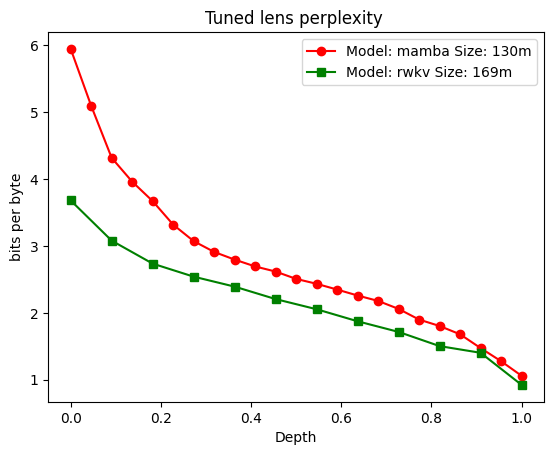

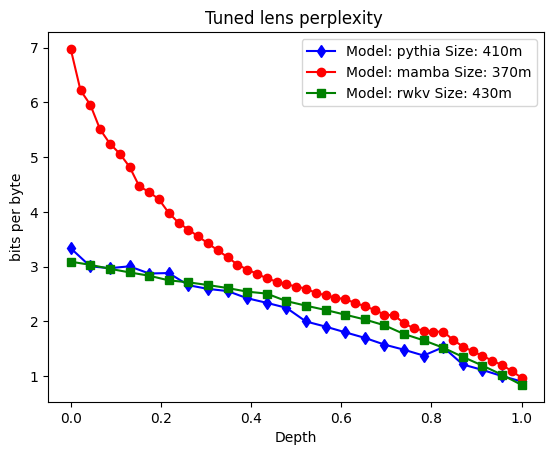

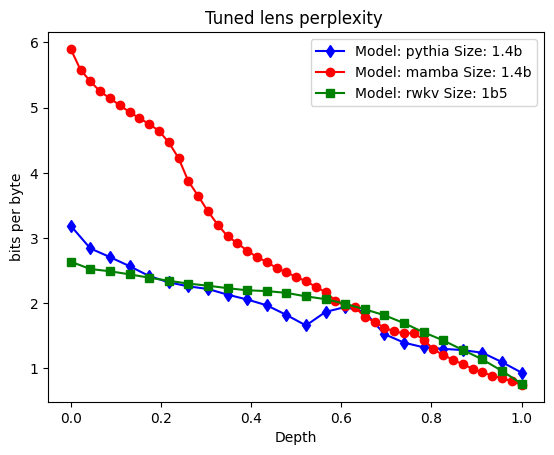

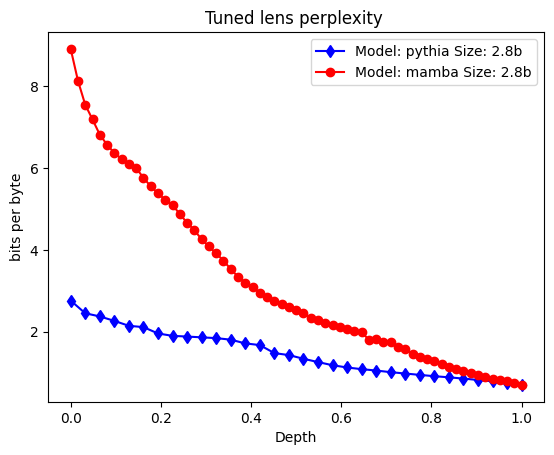

In [68]:
for sizes in ["130m","410m","1.4b","2.8b"]:
    plot_results_all_models(all_results,sizes,type="tuned",metric="ce",normalized=True,inline=False)

## Comparing all sizes

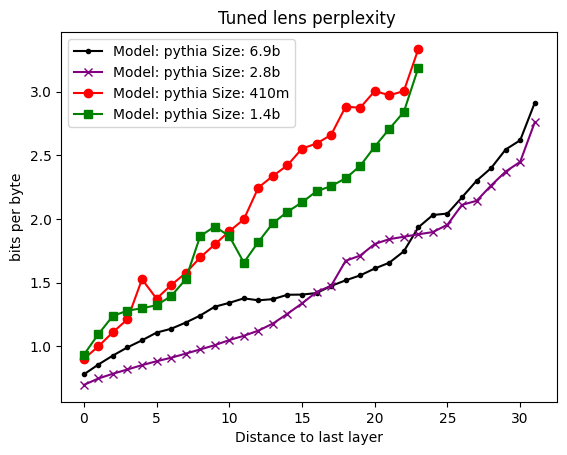

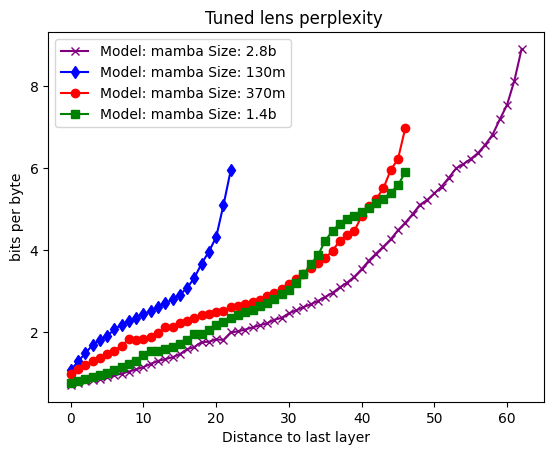

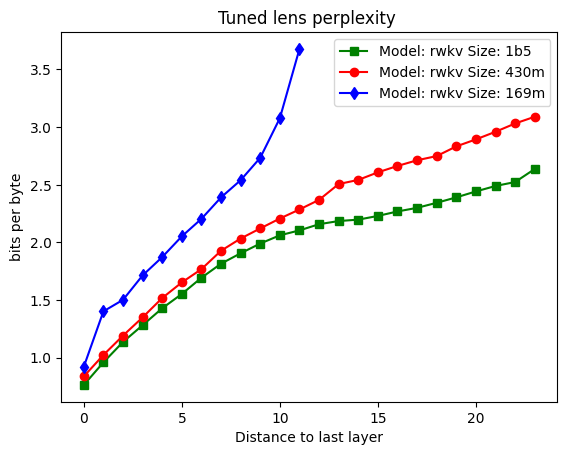

In [77]:
for model in ["pythia","mamba","rwkv"]:
    plot_results_all_models(all_results,model,type="tuned",metric="ce",normalized=False,inline=False)
   

## Layer Transfer

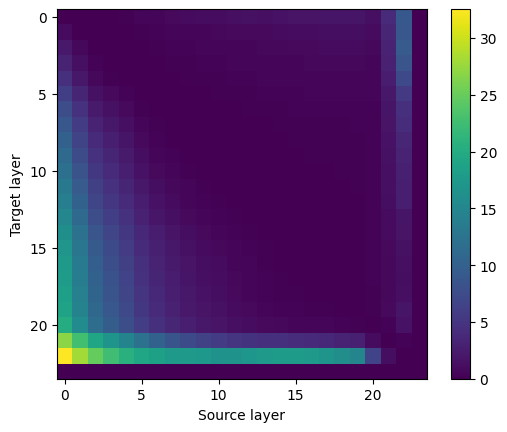

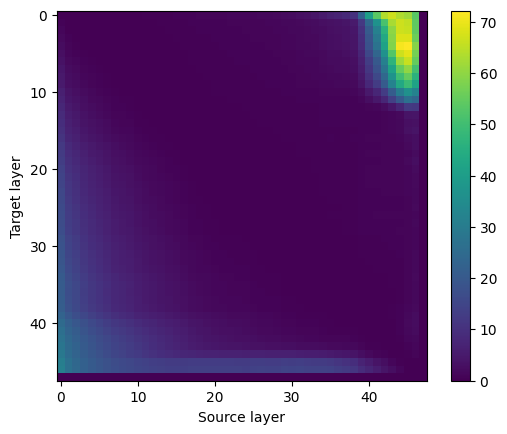

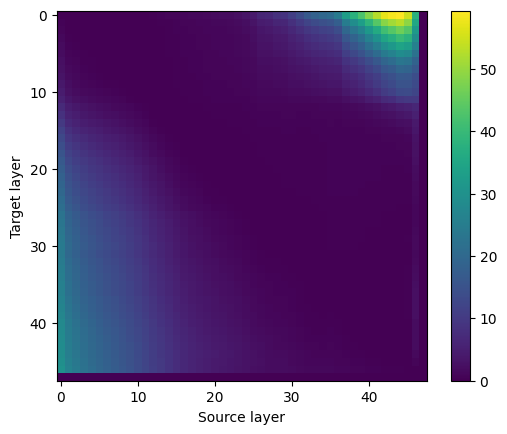

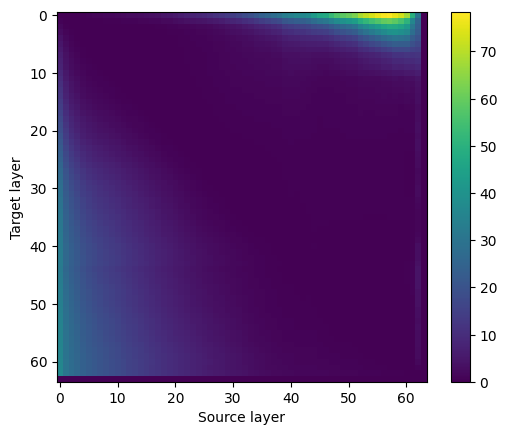

In [130]:
for model in ["mamba"]:
    for size in ["130m","370m","1.4b","2.8b"]:
        plot_layer_tranfer(all_results,model,size,metric="ce")
   

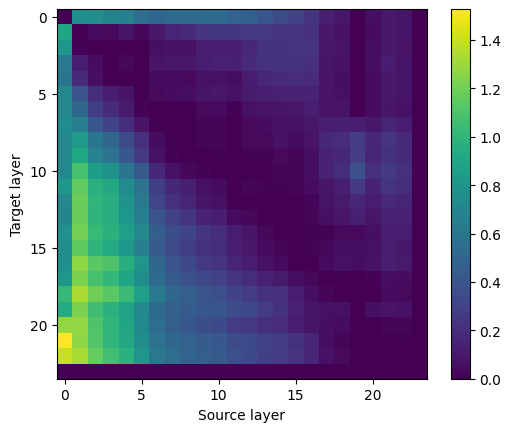

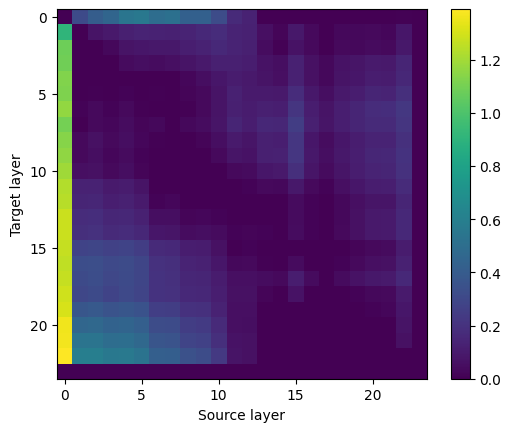

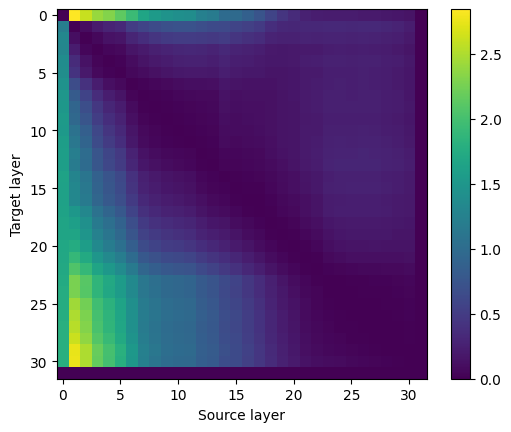

In [131]:
for model in ["pythia"]:
    for size in ["410m","1.4b","2.8b"]:
        plot_layer_tranfer(all_results,model,size,metric="ce")
   